# Рубежный контроль №1 по курсу «Методы машинного обучения»

Коротков Никита, ИУ5-23М


## Вариант задания
| Номер варианта  | Задание 1 | Задание 2 | Доп. требование |
|-----------------|-----------|-----------|-----------|
|          6      |      6    |      26   |      для произвольной колонки данных построить парные диаграммы (pairplot)   |

## Импорт библиотек

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import scipy.stats as stats

# Задание 1. Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

In [5]:
# Загрузка датасета
df = pd.read_csv('cherry_blossom_forecasts.csv', index_col=0)
df.head(10)

,date,mankai_date,kaika_date,meter,tavg,tmin,tmax,prcp
place_code,,,,,,,,
1370053,2024-02-01,2024-05-12,2024-05-07,12.0,-7.8,-11.4,-5.3,4.1
1370022,2024-02-01,2024-05-03,2024-04-29,12.0,-4.2,-7.6,0.5,0.3
1370024,2024-02-01,2024-05-09,2024-05-04,10.0,-4.2,-7.6,0.5,0.3
1370028,2024-02-01,2024-05-10,2024-05-04,13.0,-5.6,-6.8,-4.5,0.0
1370029,2024-02-01,2024-05-09,2024-05-06,13.0,NaN,NaN,NaN,NaN
1370030,2024-02-01,2024-05-15,2024-05-09,12.0,-7.1,-7.8,-1.1,3.0
1370032,2024-02-01,2024-05-10,2024-05-05,11.0,-5.2,-8.0,0.0,2.6
1370041,2024-02-01,2024-05-13,2024-05-05,12.0,-2.6,-4.9,4.0,5.0
1370046,2024-02-01,2024-05-12,2024-05-07,11.0,NaN,NaN,NaN,NaN


Проверим датасет на наличие пропусков в данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52142 entries, 1370053 to 43370005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         52142 non-null  object 
 1   mankai_date  52141 non-null  object 
 2   kaika_date   52141 non-null  object 
 3   meter        52141 non-null  float64
 4   tavg         45926 non-null  float64
 5   tmin         45926 non-null  float64
 6   tmax         45926 non-null  float64
 7   prcp         43966 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.6+ MB


В числовом признаке tavg много пропусков, заполним их средним значением

In [7]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data

In [8]:
all_data, filled_data, missed_data = impute_column(df, 'tavg', 'mean')

Заменяем исходный столбец на него же с заполненными пропусками

In [9]:
df['tavg'] = all_data
df.head(10)

,date,mankai_date,kaika_date,meter,tavg,tmin,tmax,prcp
place_code,,,,,,,,
1370053,2024-02-01,2024-05-12,2024-05-07,12.0,-7.800000,-11.4,-5.3,4.1
1370022,2024-02-01,2024-05-03,2024-04-29,12.0,-4.200000,-7.6,0.5,0.3
1370024,2024-02-01,2024-05-09,2024-05-04,10.0,-4.200000,-7.6,0.5,0.3
1370028,2024-02-01,2024-05-10,2024-05-04,13.0,-5.600000,-6.8,-4.5,0.0
1370029,2024-02-01,2024-05-09,2024-05-06,13.0,6.293827,NaN,NaN,NaN
1370030,2024-02-01,2024-05-15,2024-05-09,12.0,-7.100000,-7.8,-1.1,3.0
1370032,2024-02-01,2024-05-10,2024-05-05,11.0,-5.200000,-8.0,0.0,2.6
1370041,2024-02-01,2024-05-13,2024-05-05,12.0,-2.600000,-4.9,4.0,5.0
1370046,2024-02-01,2024-05-12,2024-05-07,11.0,6.293827,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52142 entries, 1370053 to 43370005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         52142 non-null  object 
 1   mankai_date  52141 non-null  object 
 2   kaika_date   52141 non-null  object 
 3   meter        52141 non-null  float64
 4   tavg         52142 non-null  float64
 5   tmin         45926 non-null  float64
 6   tmax         45926 non-null  float64
 7   prcp         43966 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.6+ MB


Как можно видеть, пропуски в признаки tavg были заполнены средним значением

# Задание 2. Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

In [19]:
# Загрузка датасета
df = pd.read_csv('cherry_blossom_forecasts.csv')
df.head(10)

,place_code,date,mankai_date,kaika_date,meter,tavg,tmin,tmax,prcp
0,1370053,2024-02-01,2024-05-12,2024-05-07,12,-7.8,-11.4,-5.3,4.1
1,1370022,2024-02-01,2024-05-03,2024-04-29,12,-4.2,-7.6,0.5,0.3
2,1370024,2024-02-01,2024-05-09,2024-05-04,10,-4.2,-7.6,0.5,0.3
3,1370028,2024-02-01,2024-05-10,2024-05-04,13,-5.6,-6.8,-4.5,0.0
4,1370029,2024-02-01,2024-05-09,2024-05-06,13,NaN,NaN,NaN,NaN
5,1370030,2024-02-01,2024-05-15,2024-05-09,12,-7.1,-7.8,-1.1,3.0
6,1370032,2024-02-01,2024-05-10,2024-05-05,11,-5.2,-8.0,0.0,2.6
7,1370041,2024-02-01,2024-05-13,2024-05-05,12,-2.6,-4.9,4.0,5.0
8,1370046,2024-02-01,2024-05-12,2024-05-07,11,NaN,NaN,NaN,NaN
9,1370055,2024-02-01,2024-05-09,2024-05-03,11,NaN,NaN,NaN,NaN


Функция для построения нескольких графиков

In [20]:
def diagnostic_plots(df, variable):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    plt.show()

Выявляем при помощи графиков выбросы в признаке fixed acidity

<ipython-input-20-c2e6bc34c22e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


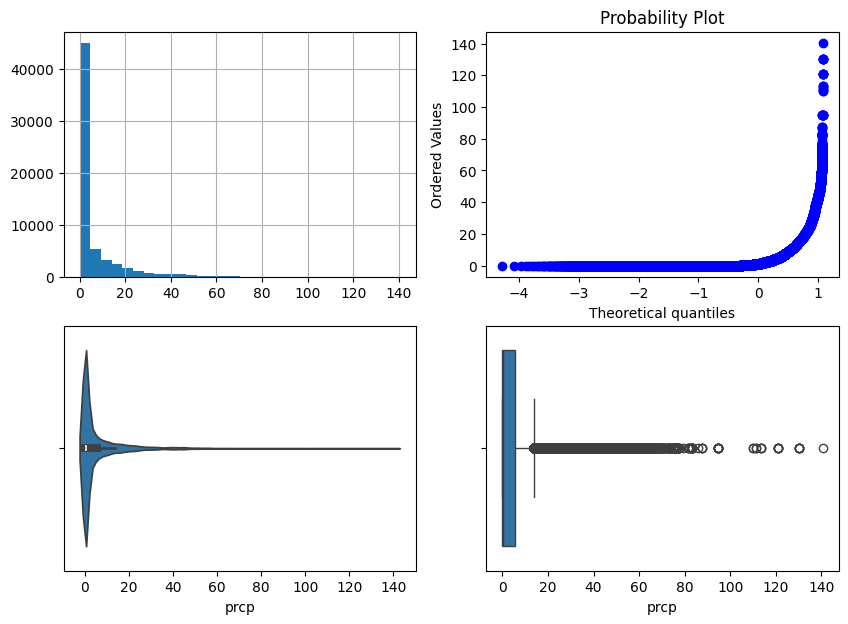

In [21]:
diagnostic_plots(df, 'prcp')

In [22]:
df.shape

(72185, 9)

Удаляем выбросы. Как можно увидеть, были удаленны только далекие от медианы выбросы, а группа ближайших (на ящике с усами) - осталась. Это показывает, что распределение было немного ассиметричным (наклоненным). Но метод сработал хорошо и не удалил группу значений, не являющуюся выбросами

<ipython-input-20-c2e6bc34c22e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


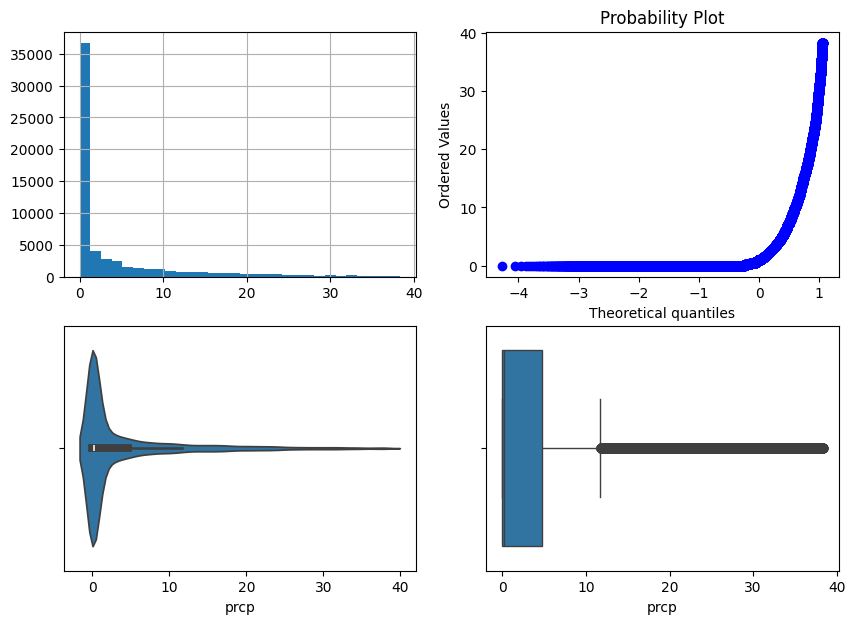

In [23]:
col = 'prcp'

# Вычисление верхней и нижней границы
lower_boundary = df[col].mean() - (3 * df[col].std())
upper_boundary = df[col].mean() + (3 * df[col].std())
# Флаги для удаления выбросов
outliers_temp = np.where(df[col] > upper_boundary, True,
                          np.where(df[col] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = df.loc[~(outliers_temp), ]

diagnostic_plots(data_trimmed, col)

Количество строк уменьшилось

In [24]:
data_trimmed.shape

(70289, 9)

# Построение графика по варианту

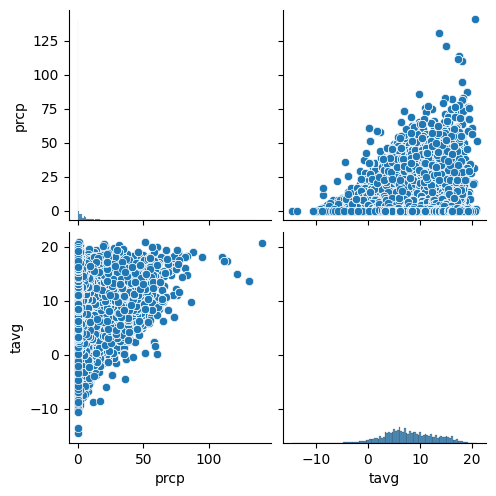

In [27]:
sns.pairplot(df, vars=['prcp', 'tavg'])